# Simple GANs implementation

In [1]:
# import Keras dataset
from keras.datasets import mnist

# load dataset
(X_train, _), (X_test, _) = mnist.load_data()


X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

 

2023-06-04 20:40:34.347735: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-04 20:40:34.396495: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-04 20:40:34.506356: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-04 20:40:34.506904: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-04 20:40:35.337512: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

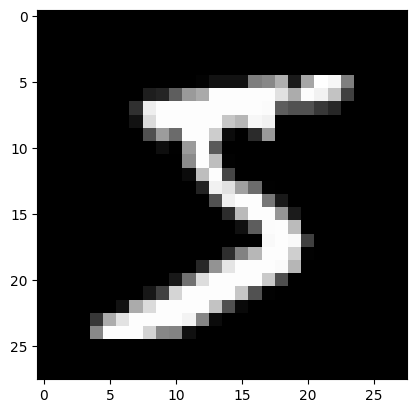

In [2]:
# plot the first image in the dataset
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Reshape, UpSampling2D
import numpy as np

class Generator():
    def __init__(self, in_shape=(100,)):
        self.model = Sequential()
        self.model.add(Dense(128*7*7, input_shape=in_shape, activation='sigmoid'))
        self.model.add(Reshape((7,7,128)))
        self.model.add(Conv2D(128, (3,3), padding='same', activation='sigmoid'))
        self.model.add(UpSampling2D((2,2)))
        self.model.add(Conv2D(64, (3,3), padding='same', activation='sigmoid'))
        self.model.add(UpSampling2D((2,2)))
        self.model.add(Conv2D(1, (3,3), padding='same', activation='sigmoid'))
        self.model.summary()

In [4]:
class Discriminator():
    def __init__(self, in_shape=(28,28,1)) -> None:
        self.model = Sequential()
        self.model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=in_shape, activation='sigmoid'))
        self.model.add(Conv2D(32, (3,3), strides=(2,2), padding='same', activation='sigmoid'))
        self.model.add(Flatten())
        self.model.add(Dense(16, activation='sigmoid'))
        self.model.add(Dense(1, activation='sigmoid'))
        # compile model
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    def train(self, X, y, epochs=3, batch_size=128):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size)

In [5]:
class GAN():
    def __init__(self, generator, discriminator) -> None:
        self.discriminator = discriminator
        self.generator = generator
        self.model = Sequential()
        self.model.add(self.generator.model)
        self.model.add(self.discriminator.model)
        self.discriminator.model.trainable = False
        self.model.compile(loss='binary_crossentropy', optimizer='adam')
        self.x = 0
    
    def train(self, realData):
        noise = np.random.normal(0, 1, (realData.shape[0], 100))
        fakeData = self.generator.model.predict(noise)
        print(fakeData.shape)
        print(realData.shape)
        X = np.concatenate((realData, fakeData))
        y = np.ones((realData.shape[0]+fakeData.shape[0], 1))
        y[realData.shape[0]:] = 0
        self.discriminator.train(X, y)
        self.model.fit(noise, np.ones((realData.shape[0], 1)), epochs=100, batch_size=128)
    
    def display(self, n=10):
        noise = np.random.normal(0, 1, (n*n, 100))
        fakeData = self.generator.model.predict(noise)
        for i in range(n*n):
            plt.subplot(n, n, i+1)
            plt.axis('off')
            plt.imshow(fakeData[i], cmap='gray')
        plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              633472    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 128)         147584    
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 up_sampling2d_1 (UpSampling  (None, 28, 28, 64)       0         
 2D)                                                    

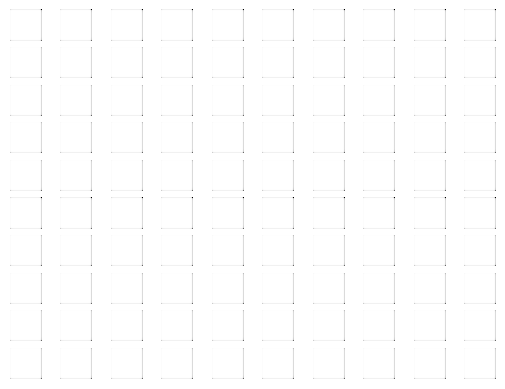

4/4 [==============================] - 0s 8ms/step
(100, 28, 28, 1)
(100, 28, 28, 1)
Epoch 1/3
2/2 [==============================] - 0s 6ms/step - loss: 0.6606 - accuracy: 0.5000
Epoch 2/3
2/2 [==============================] - 0s 7ms/step - loss: 0.6319 - accuracy: 0.9850
Epoch 3/3
2/2 [==============================] - 0s 6ms/step - loss: 0.6206 - accuracy: 0.6850
Epoch 1/100
1/1 [==============================] - 0s 63ms/step - loss: 0.9338
Epoch 2/100
1/1 [==============================] - 0s 60ms/step - loss: 0.9338
Epoch 3/100
1/1 [==============================] - 0s 61ms/step - loss: 0.9338
Epoch 4/100
1/1 [==============================] - 0s 61ms/step - loss: 0.9338
Epoch 5/100
1/1 [==============================] - 0s 61ms/step - loss: 0.9338
Epoch 6/100
1/1 [==============================] - 0s 60ms/step - loss: 0.9338
Epoch 7/100
1/1 [==============================] - 0s 61ms/step - loss: 0.9338
Epoch 8/100
1/1 [==============================] - 0s 61ms/step - loss: 0.933

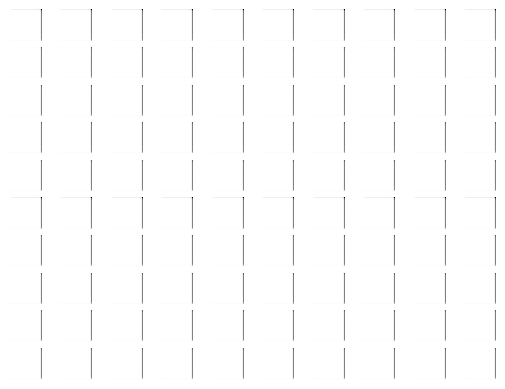

4/4 [==============================] - 0s 8ms/step
(100, 28, 28, 1)
(100, 28, 28, 1)
Epoch 1/3
2/2 [==============================] - 0s 7ms/step - loss: 0.5912 - accuracy: 0.7850
Epoch 2/3
2/2 [==============================] - 0s 8ms/step - loss: 0.5537 - accuracy: 0.9850
Epoch 3/3
2/2 [==============================] - 0s 8ms/step - loss: 0.5204 - accuracy: 1.0000
Epoch 1/100
1/1 [==============================] - 0s 68ms/step - loss: 0.8131
Epoch 2/100
1/1 [==============================] - 0s 59ms/step - loss: 0.8130
Epoch 3/100
1/1 [==============================] - 0s 61ms/step - loss: 0.8130
Epoch 4/100
1/1 [==============================] - 0s 61ms/step - loss: 0.8129
Epoch 5/100
1/1 [==============================] - 0s 59ms/step - loss: 0.8129
Epoch 6/100
1/1 [==============================] - 0s 66ms/step - loss: 0.8128
Epoch 7/100
1/1 [==============================] - 0s 61ms/step - loss: 0.8128
Epoch 8/100
1/1 [==============================] - 0s 64ms/step - loss: 0.812

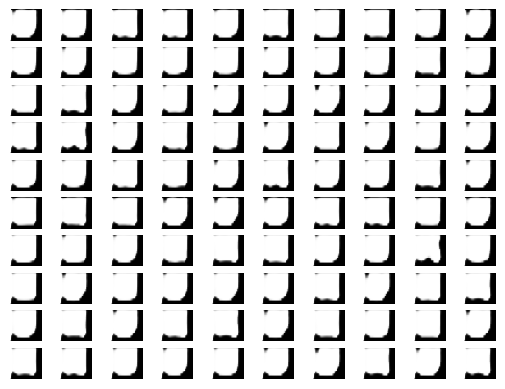

4/4 [==============================] - 0s 8ms/step
(100, 28, 28, 1)
(100, 28, 28, 1)
Epoch 1/3
2/2 [==============================] - 0s 7ms/step - loss: 0.4815 - accuracy: 1.0000
Epoch 2/3
2/2 [==============================] - 0s 7ms/step - loss: 0.4273 - accuracy: 0.9900
Epoch 3/3
2/2 [==============================] - 0s 7ms/step - loss: 0.3739 - accuracy: 0.9750
Epoch 1/100
1/1 [==============================] - 0s 73ms/step - loss: 1.3214
Epoch 2/100
1/1 [==============================] - 0s 73ms/step - loss: 1.3210
Epoch 3/100
1/1 [==============================] - 0s 72ms/step - loss: 1.3214
Epoch 4/100
1/1 [==============================] - 0s 74ms/step - loss: 1.3204
Epoch 5/100
1/1 [==============================] - 0s 75ms/step - loss: 1.3194
Epoch 6/100
1/1 [==============================] - 0s 77ms/step - loss: 1.3200
Epoch 7/100
1/1 [==============================] - 0s 78ms/step - loss: 1.3190
Epoch 8/100
1/1 [==============================] - 0s 79ms/step - loss: 1.318

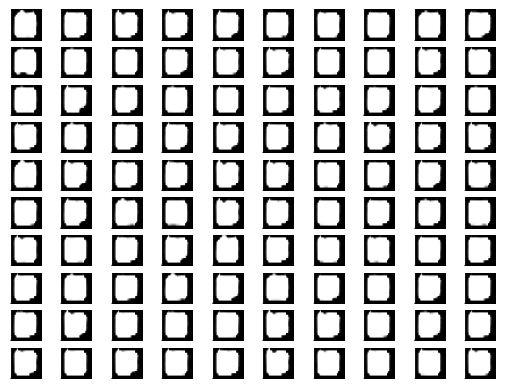

4/4 [==============================] - 0s 8ms/step
(100, 28, 28, 1)
(100, 28, 28, 1)
Epoch 1/3
2/2 [==============================] - 0s 7ms/step - loss: 0.3205 - accuracy: 1.0000
Epoch 2/3
2/2 [==============================] - 0s 9ms/step - loss: 0.2734 - accuracy: 1.0000
Epoch 3/3
2/2 [==============================] - 0s 8ms/step - loss: 0.2322 - accuracy: 1.0000
Epoch 1/100
1/1 [==============================] - 0s 65ms/step - loss: 1.6328
Epoch 2/100
1/1 [==============================] - 0s 72ms/step - loss: 1.6326
Epoch 3/100
1/1 [==============================] - 0s 70ms/step - loss: 1.6327
Epoch 4/100
1/1 [==============================] - 0s 74ms/step - loss: 1.6326
Epoch 5/100
1/1 [==============================] - 0s 74ms/step - loss: 1.6324
Epoch 6/100
1/1 [==============================] - 0s 75ms/step - loss: 1.6322
Epoch 7/100
1/1 [==============================] - 0s 78ms/step - loss: 1.6322
Epoch 8/100
1/1 [==============================] - 0s 78ms/step - loss: 1.631

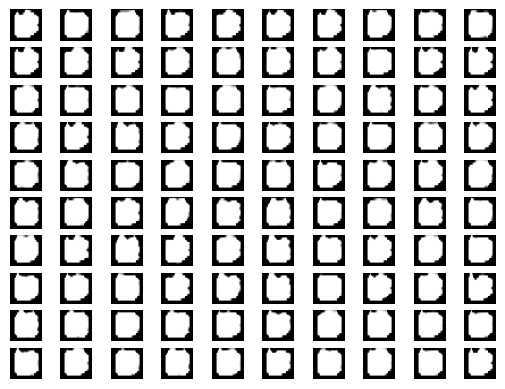

4/4 [==============================] - 0s 9ms/step
(100, 28, 28, 1)
(100, 28, 28, 1)
Epoch 1/3
2/2 [==============================] - 0s 5ms/step - loss: 0.1945 - accuracy: 1.0000
Epoch 2/3
2/2 [==============================] - 0s 6ms/step - loss: 0.1646 - accuracy: 1.0000
Epoch 3/3
2/2 [==============================] - 0s 7ms/step - loss: 0.1405 - accuracy: 1.0000
Epoch 1/100
1/1 [==============================] - 0s 68ms/step - loss: 2.0221
Epoch 2/100
1/1 [==============================] - 0s 72ms/step - loss: 2.0217
Epoch 3/100
1/1 [==============================] - 0s 71ms/step - loss: 2.0217
Epoch 4/100
1/1 [==============================] - 0s 79ms/step - loss: 2.0217
Epoch 5/100
1/1 [==============================] - 0s 76ms/step - loss: 2.0216
Epoch 6/100
1/1 [==============================] - 0s 76ms/step - loss: 2.0214
Epoch 7/100
1/1 [==============================] - 0s 75ms/step - loss: 2.0215
Epoch 8/100
1/1 [==============================] - 0s 75ms/step - loss: 2.021

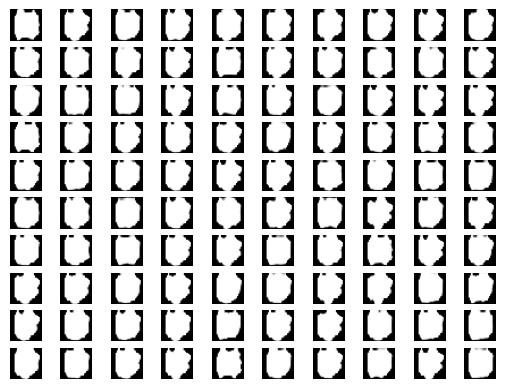

4/4 [==============================] - 0s 8ms/step
(100, 28, 28, 1)
(100, 28, 28, 1)
Epoch 1/3
2/2 [==============================] - 0s 7ms/step - loss: 0.1215 - accuracy: 1.0000
Epoch 2/3
2/2 [==============================] - 0s 7ms/step - loss: 0.1072 - accuracy: 1.0000
Epoch 3/3
2/2 [==============================] - 0s 7ms/step - loss: 0.0959 - accuracy: 1.0000
Epoch 1/100
1/1 [==============================] - 0s 65ms/step - loss: 2.2907
Epoch 2/100
1/1 [==============================] - 0s 70ms/step - loss: 2.2904
Epoch 3/100
1/1 [==============================] - 0s 76ms/step - loss: 2.2904
Epoch 4/100
1/1 [==============================] - 0s 74ms/step - loss: 2.2903
Epoch 5/100
1/1 [==============================] - 0s 75ms/step - loss: 2.2901
Epoch 6/100
1/1 [==============================] - 0s 76ms/step - loss: 2.2901
Epoch 7/100
1/1 [==============================] - 0s 78ms/step - loss: 2.2900
Epoch 8/100
1/1 [==============================] - 0s 79ms/step - loss: 2.289

In [6]:
generator = Generator()
discriminator = Discriminator()
gan = GAN(generator, discriminator)

for i in range(100):
    gan.train(X_train[:100])
    gan.display()